## Influenza national summary (green and yellow chart) 

[1] "Week"     "variable" "value"

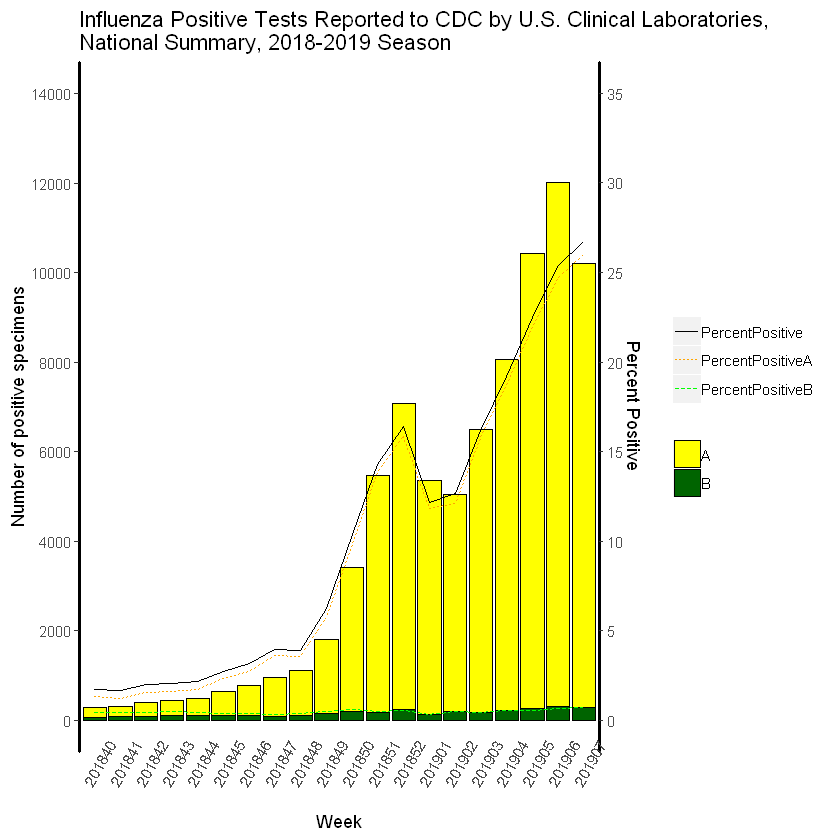

In [96]:
library(ggplot2)
library(reshape2) 

data1 <-read.csv("Influenza national summary (green and yellow chart).csv", header=T)
names(data1)<- c("Week", "A","B","PercentPositiveA","PercentPositiveB","TotalTested","PercentPositive")

bar_data <- data1[,c(1,2,3)]
melt_bar <- melt(bar_data, id = c('Week'))
melt_bar <- melt_bar[! is.na(melt_bar$value) ,]

line_data <- data1[,c(1,4,5,7)]
melt_line <- melt(line_data, id = c('Week'))
names(melt_line)
melt_line$variable <-  factor(melt_line$variable,levels = c("PercentPositive", "PercentPositiveA", "PercentPositiveB"))

chart1 <- ggplot() +
  geom_bar(data = melt_bar, aes(x = factor(Week), y = value, fill = variable), color = 'black', stat = 'identity') +
  scale_fill_manual(values = c('yellow', 'darkgreen')) +
  xlab('Week') +
  ylab('Number of positive specimens') +
  geom_line(data = melt_line, aes(x = factor(Week), y = value*400, color = variable, group = variable, linetype = variable)) +
  scale_y_continuous(sec.axis = sec_axis(~.*(1/400), name = "Percent Positive", breaks = seq(0,35,5)), breaks = seq(0,14000,2000), limits = c(0,14000)) +
  theme(axis.text.x = element_text(angle = 60),
        legend.title = element_blank(),
        axis.ticks.x = element_blank(), 
        axis.line.x.top = element_line(size = 1),
        axis.line.y = element_line(size=1),
        panel.background = element_rect(fill = 'white')) +
  #scale_x_date(breaks = melt_bar[seq(1, length(Week), by = 2)]) +scale_x_date(breaks = melt_bar[seq(1, length(Week), by = 2)]) +
  scale_color_manual(values = c("black", "orange", "green")) +
  #scale_linetype_manual(values = c("solid", "longdashed", "dashed")) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \nNational Summary, 2018-2019 Season") 
  #scale_x_discrete(limits = melt_bar$Week[seq(1, length(melt_bar$Week), by = 2)])

chart1

## Positive tested

 [1] 201840 201842 201844 201846 201848 201850 201852 201902 201904 201906
[11] 201908 201841 201843 201845 201847 201849 201851 201901 201903 201905
[21] 201907 201840 201842 201844 201846 201848 201850 201852 201902 201904
[31] 201906 201908 201841 201843 201845 201847 201849 201851 201901 201903
[41] 201905 201907 201840 201842 201844 201846 201848 201850 201852 201902
[51] 201904 201906 201908 201841 201843 201845 201847 201849 201851 201901
[61] 201903 201905 201907 201840 201842 201844 201846 201848 201850 201852
[71] 201902 201904 201906 201908


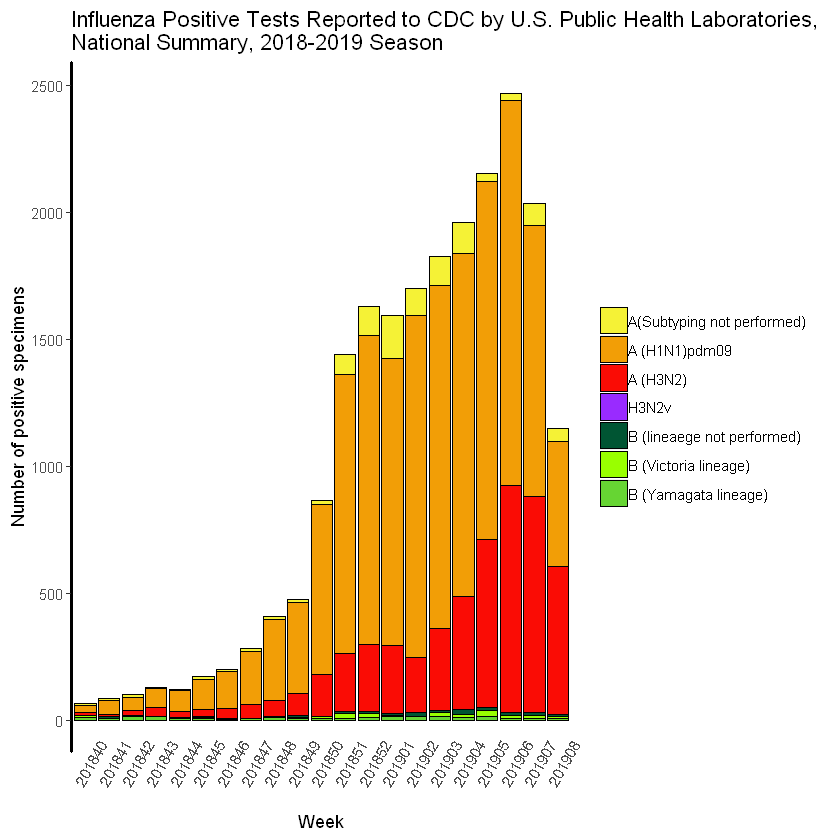

In [122]:
library(ggplot2)
library(reshape2) 
library(plotly)

data2 <- read.csv("Positive tested.csv", header=T)
names(data2) <- c('Week', 'H3N2v', 'A (H1N1)pdm09', 'A (H3N2)', 'A (Unable to sub type)', 'A(Subtyping not performed)', 'B (lineaege not performed)', 'B (Victoria lineage)', 'B (Yamagata lineage)', 'Total tested')
data2 <- data2[, -c(5,10)]
data_melt <- melt(data2, id = c('Week'))
data_melt$variable <- factor(data_melt$variable, levels = c('A(Subtyping not performed)','A (H1N1)pdm09', 'A (H3N2)','H3N2v','B (lineaege not performed)', 'B (Victoria lineage)', 'B (Yamagata lineage)'))
chart2 <- ggplot(data = data_melt) +
            xlab('Week') +
            ylab('Number of positive specimens') +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, \nNational Summary, 2018-2019 Season") +
            geom_bar(mapping = aes(x = factor(Week),  y = value, fill = variable), color = 'black', stat = 'identity') +
            theme(axis.text.x = element_text(angle = 60),
                  legend.title = element_blank(),
                  axis.ticks.x = element_blank(),
                  axis.line.x.top = element_line(size = 1),
                  axis.line.y = element_line(size =1),
                  panel.background = element_rect(fill = 'white')) +
            scale_fill_manual(values = c('#F5F236', '#F29E06', '#FA0C05', '#992BFF', '#005533', '#99FF00', '#66D533')) 
#ggplotly(chart2)
chart2
print(data_melt$Week[seq(1,length(data_melt$Week),2)])


In [21]:
#ggplotly(chart2)

## Flu heat map of USA (Required) 

[1] Level 10 Level 8  Level 6  Level 7  Level 5  Level 4  Level 9  Level 1 
11 Levels: Level 0 Level 1 Level 10 Level 2 Level 3 Level 4 Level 5 ... Level 9

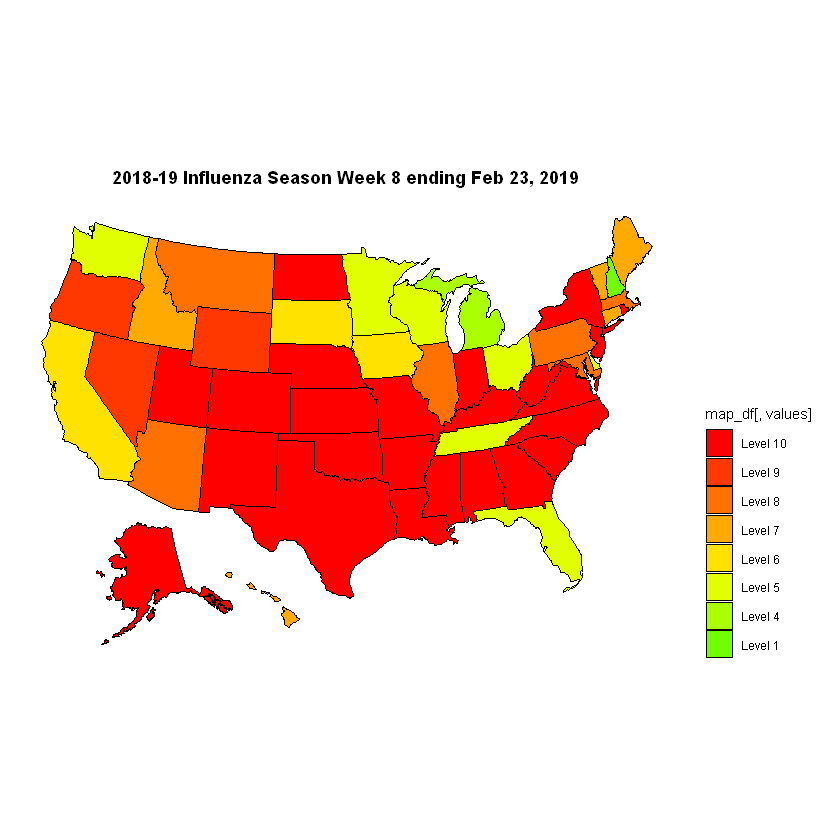

In [99]:
library(ggplot2)
library(usmap)

data3 <- read.csv("StateDatabyWeekforMap_2018-19week40-8.csv", header=T)
colfunc <- colorRampPalette(c("red", "yellow", "green"))
usmapdata <- merge(x=data3, y=statepop, x.by=STATENAME, y.by=full, x.all= TRUE)
usmapdata <- usmapdata[ usmapdata$STATENAME == usmapdata$full & usmapdata$WEEK == 8,]
unique(usmapdata$ACTIVITY.LEVEL)
usmapdata$ACTIVITY.LEVEL <- factor(usmapdata$ACTIVITY.LEVEL, levels = c("Level 10", "Level 9", "Level 8", "Level 7", "Level 6", "Level 5", "Level 4", "Level 1"))
plot_usmap(data = usmapdata, values = "ACTIVITY.LEVEL", lines = "black") +
  scale_fill_manual(values = c("#FF0000", "#FF3800" ,"#FF7100" ,"#FFAA00" ,"#FFE200" ,"#E2FF00" ,"#AAFF00", "#71FF00", "#38FF00" ,"#00FF00")) +
  theme(legend.position = "right",
        legend.title = element_text("ILI Activity Level", face = "bold"),
        plot.title = element_text(hjust = 0.5, face="bold")) + 
  ggtitle("2018-19 Influenza Season Week 8 ending Feb 23, 2019") 



## Mortality

[1] "Year"                                            
[2] "Week"                                            
[3] "Percent.of.Deaths.Due.to.Pneumonia.and.Influenza"
[4] "Expected"                                        
[5] "Threshold"                                       
[6] "All.Deaths"                                      
[7] "Pneumonia.Deaths"                                
[8] "Influenza.Deaths"

Warning message:
"Removed 3 rows containing missing values (geom_path)."

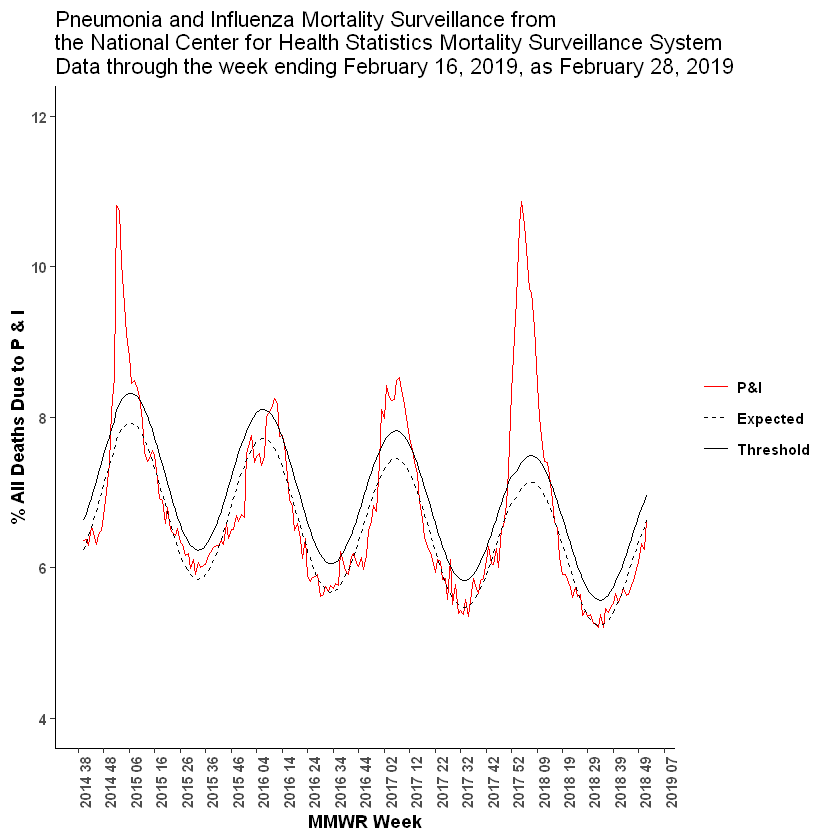

In [41]:
library(ggplot2)
library(stringr)
library(plotly)

  chart3_data <- read.csv(file = 'NCHSData08.csv', header = T)
  names(chart3_data)
  chart3_data = chart3_data[, !(names(chart3_data) %in% c('All.Deaths', 'Pneumonia.Deaths','Influenza.Deaths'))]
  names(chart3_data) <- c('Year','Week','P&I','Expected','Threshold')
  
  melt_data <- melt(chart3_data, id = c('Year','Week'))
  melt_data <- melt_data[!(melt_data$Year<2014 | melt_data$Year>2018),] #filtering data below 2014 and above 2018
  melt_data <- melt_data[!(melt_data$Year==2014 & melt_data$Week<40),] #filering data earlier to week 40 2014
  
  melt_data$MMWR_Week <- factor(as.Date(paste(melt_data$Year, melt_data$Week, 01, sep="-"), "%Y-%U-%u"))

  melt_data <- melt_data[,-c(1,2)]
  
  chart3 <- ggplot() +
    ggtitle("Pneumonia and Influenza Mortality Surveillance from \nthe National Center for Health Statistics Mortality Surveillance System \nData through the week ending February 16, 2019, as February 28, 2019") +
    geom_line(data = melt_data, mapping = aes(x = as.Date(MMWR_Week), y = value, group = variable, color = variable, linetype = variable)) +
    
    scale_color_manual(values = c('red', 'black', 'black')) +
    scale_linetype_manual(values = c('solid','dashed','solid')) +
    scale_x_date(date_labels = "%Y %U", date_breaks = "10 week") +
    scale_y_continuous(limits = c(4,12)) +
    xlab('MMWR Week') +
    ylab('% All Deaths Due to P & I') +
    theme(axis.title = element_text(face = "bold"),
          axis.text = element_text(face = "bold"),
          axis.text.x = element_text(angle=90),
          axis.line.y = element_line(size=0.5),
          axis.line.x = element_line(size=0.5),
          axis.line.x.top = element_line(size = 0.5),
          #axis.ticks.x = element_blank(),
          axis.ticks.length = unit(1,'mm'),
          legend.title = element_blank() ,
          legend.text = element_text(face = "bold",margin = margin(1.5,1.5,1.5,1.5,"mm")), #to add space between legend symbol and name
          legend.key = element_rect(fill = "white"), #to make legend symbol background white
          panel.background = element_rect(fill = "white", colour = NA))   #to make the chart background white
  
chart3

## Pediatric deaths 

[1]  94 110 185  56

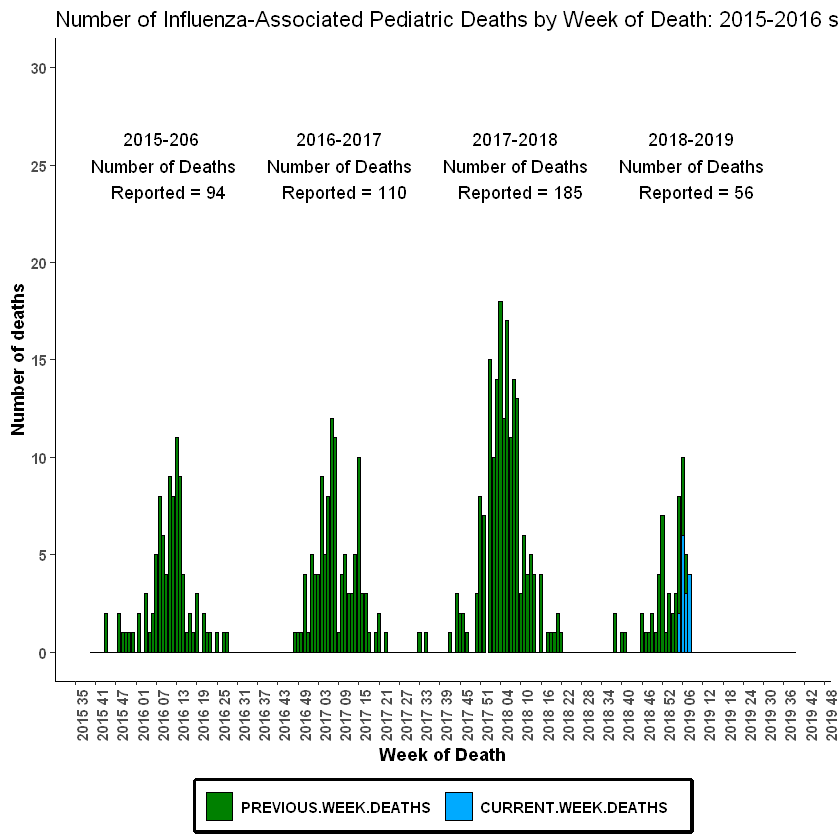

In [140]:
library(ggplot2)
library(plotly)
library(tidyverse)
##chart4
chart4_data <- read.csv(file = 'INFLUENZA-ASSOCIATED PEDIATRIC MORTALITY.csv', header = T) #skip is used to skip n lines from beginning
#names(chart4_data) <- c("SEASON","WEEK.NUMBER","No. of Deaths","Deaths Reported Previous Week","Deaths Reported Current Week")
#head(chart4_data)

library(tidyverse)

aggregate <- as.data.frame(aggregate(chart4_data$NO..OF.DEATHS, list(chart4_data$SEASON), FUN = sum))
aggregate[,2]

chart4_data <- chart4_data[,-3]
melt_data <- melt(chart4_data, id = c('SEASON','WEEK.NUMBER'))
melt_data$WEEK.NUMBER <- as.Date(paste(melt_data$WEEK.NUMBER, 01, sep="-"), "%Y-%U-%u")
#length(unique(melt_data$WEEK.NUMBER))
#names(melt_data)
chart4 <- ggplot() +
  geom_bar(data = melt_data, mapping = aes(x = WEEK.NUMBER, y = value, fill = variable), stat = "identity", color = "black") +
  #facet_wrap(~ SEASON, ncol = 2) +
  scale_x_date(date_labels = "%Y %U", date_breaks = "6 week") +
  scale_y_continuous(limits = c(0,30), breaks = seq(0,30,5)) +
  scale_fill_manual(values = c('#008000','#00AAFF')) +
  xlab('Week of Death') +
  ylab('Number of deaths') +
  ggtitle("Number of Influenza-Associated Pediatric Deaths by Week of Death: 2015-2016 season to present") +
  theme(axis.title = element_text(face = "bold"),
        axis.text = element_text(face = "bold"),
        axis.text.x = element_text(angle=90),
        axis.line.y = element_line(size=0.5),
        #axis.line.x = element_line(size=0.5),
        axis.line.x = element_line(size = 0.5),
        #axis.ticks.x = element_blank(),
        axis.ticks.length = unit(1,'mm'),
        legend.title = element_blank() ,
        legend.text = element_text(face = "bold",margin = margin(1.5,1.5,1.5,1.5,"mm")), #to add space between legend symbol and name
        legend.key = element_rect(fill = "white"), #to make legend symbol background white
        legend.position = 'bottom',
        panel.background = element_rect(fill = "white", colour = NA),#to make the chart background white
        legend.box.background = element_rect(color = 'black', size = 2)) +
        annotate("text",x = as.Date('2016 10','%Y %U'), y = 25, label = ('2015-206  \nNumber of Deaths \n Reported = 94')) +
        annotate("text",x = as.Date('2017 05','%Y %U'), y = 25, label = ('2016-2017 \nNumber of Deaths \n Reported = 110')) +
        annotate("text",x = as.Date('2018 04','%Y %U'), y = 25, label = ('2017-2018 \nNumber of Deaths \n Reported = 185')) +
        annotate("text",x = as.Date('2019 06','%Y %U'), y = 25, label = ('2018-2019 \nNumber of Deaths \n Reported = 56')) 
        
chart4


## Influenza national summary (green and yellow chart) for 52 Weeks

Warning message:
"Removed 5 rows containing missing values (position_stack)."Warning message:
"Removed 3 rows containing missing values (geom_bar)."

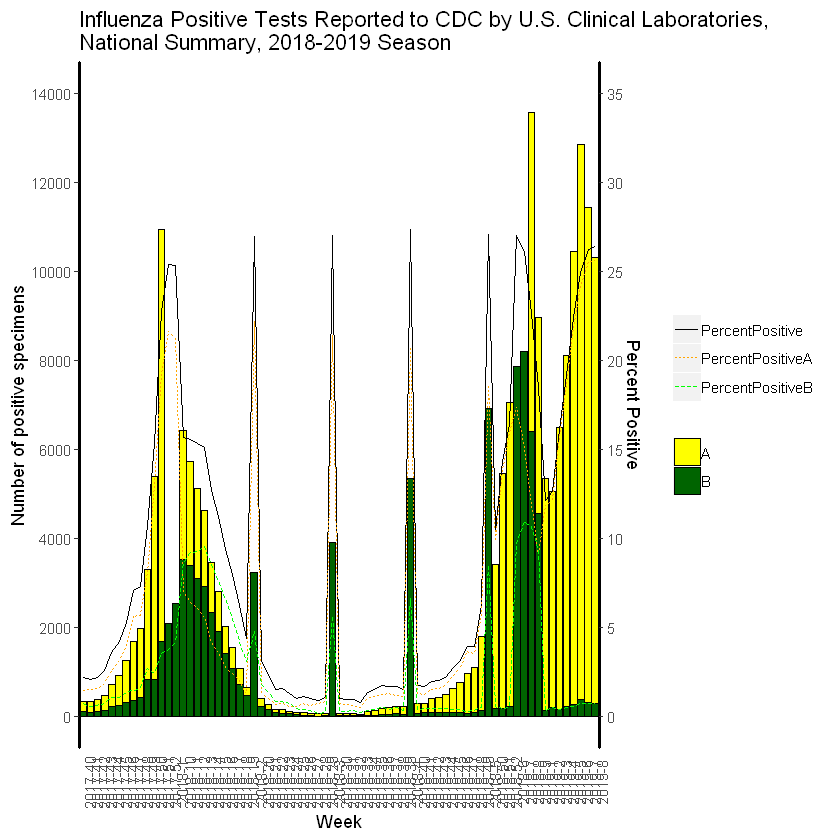

In [132]:
library(ggplot2)
library(reshape2) 

data1 <-read.csv("WHO_NREVSS_Clinical_Labs.csv", header=T)
names(data1)<- c("Region Type","Region","Year","Week","TotalTested", "A","B","PercentPositive","PercentPositiveA","PercentPositiveB")

data1$wy <- paste(data1$Year, data1$Week, sep = '-')
#names(data1)
#head(data1$wy)

bar_data <- data1[,c(6,7,11)]
melt_bar <- melt(bar_data, id = c('wy'))
melt_bar <- melt_bar[! is.na(melt_bar$value) ,]
#names(melt_bar)

line_data <- data1[,c(8,9,10,11)]
melt_line <- melt(line_data, id = c('wy'))
#names(melt_line)
melt_line$variable <-  factor(melt_line$variable,levels = c("PercentPositive", "PercentPositiveA", "PercentPositiveB"))

chart8 <- ggplot() +
  geom_bar(data = melt_bar, aes(x = factor(wy), y = value, fill = variable), color = 'black', stat = 'identity') +
  scale_fill_manual(values = c('yellow', 'darkgreen')) +
  xlab('Week') +
  ylab('Number of positive specimens') +
  geom_line(data = melt_line, aes(x = factor(wy), y = value*400, color = variable, group = variable, linetype = variable)) +
  scale_y_continuous(sec.axis = sec_axis(~.*(1/400), name = "Percent Positive", breaks = seq(0,35,5)), breaks = seq(0,14000,2000), limits = c(0,14000)) +
  theme(legend.title = element_blank(),
        axis.ticks.x = element_blank(), 
        axis.line.x.top = element_line(size = 1),
        axis.line.y = element_line(size=1),
        axis.text.x = element_text(angle=90),
        panel.background = element_rect(fill = 'white')) +
  scale_color_manual(values = c("black", "orange", "green")) +
  #scale_linetype_manual(values = c("solid", "longdashed", "dashed")) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \nNational Summary, 2018-2019 Season")

chart8


## Positive tested 52 Weeks

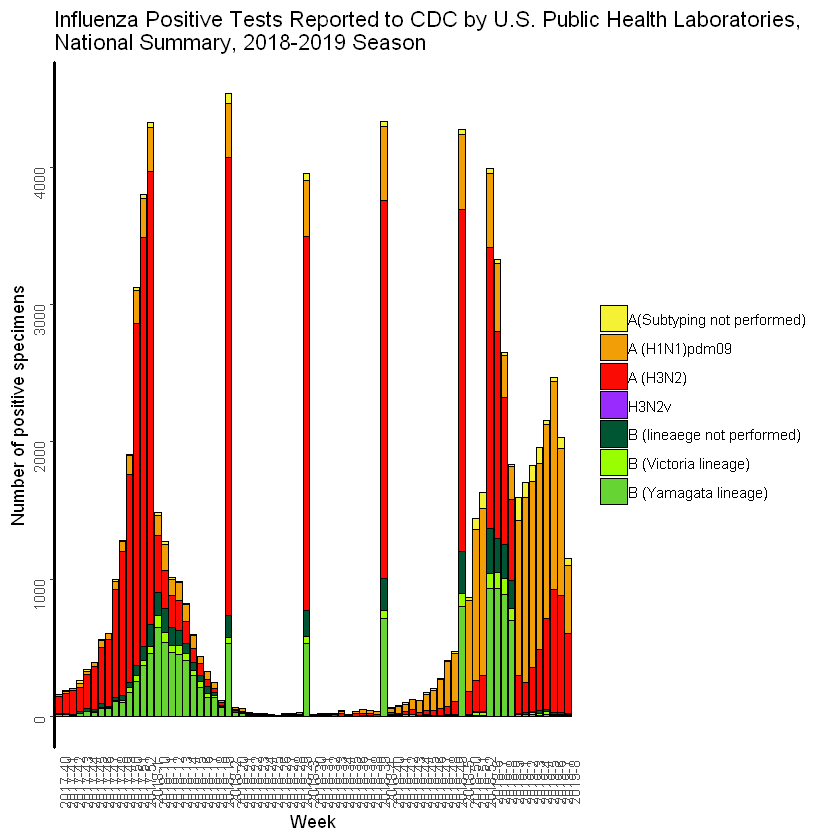

In [129]:
library(ggplot2)
library(reshape2) 
library(plotly)

data7 <-read.csv(file ='WHO_NREVSS_Public_Health_Labs.csv', header=T)
names(data7) <- c('Region Type','Region','Year','Week','Total tested','A (H1N1)pdm09','A (H3N2)','A(Subtyping not performed)','B (lineaege not performed)', 'B (Victoria lineage)', 'B (Yamagata lineage)' ,'H3N2v')
data7$yw <- paste(data7$Year,data7$Week,sep='-')
data7 <- data7[, -c(1,2,3,4,5)]
#names(data7)
data_melt <- melt(data7, id = c('yw'))
data_melt$variable <- factor(data_melt$variable, levels = c('A(Subtyping not performed)','A (H1N1)pdm09', 'A (H3N2)','H3N2v','B (lineaege not performed)', 'B (Victoria lineage)', 'B (Yamagata lineage)'))
chart7 <- ggplot(data = data_melt) +
  xlab('Week') +
  ylab('Number of positive specimens') +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, \nNational Summary, 2018-2019 Season") +
  geom_bar(mapping = aes(x = factor(yw),  y = value, fill = variable), color = 'black', stat = 'identity') +
  theme(legend.title = element_blank(),
        axis.ticks.x = element_blank(),
        axis.line.x.top = element_line(size = 1),
        axis.text = element_text(angle = 90),
        axis.line.y = element_line(size =1),
        panel.background = element_rect(fill = 'white')) +
  
  scale_fill_manual(values = c('#F5F236', '#F29E06', '#FA0C05', '#992BFF', '#005533', '#99FF00', '#66D533'))
#ggplotly(chart7)
chart7


## Influenza national summary (green and yellow chart) for New York State

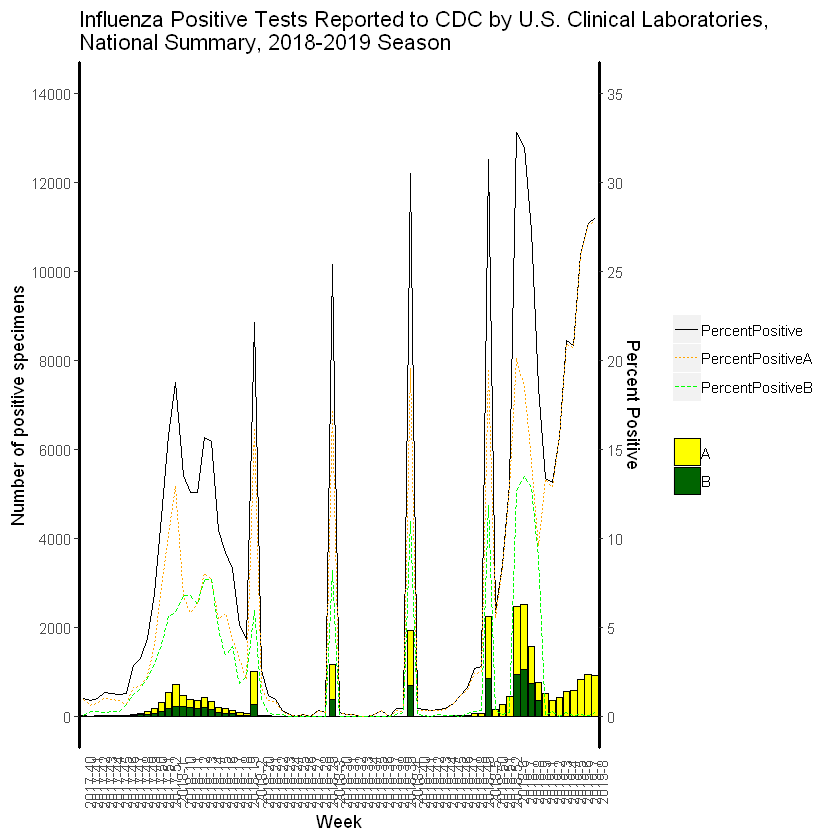

In [130]:
library(ggplot2)
library(reshape2) 

data1 <-read.csv("WHO_NREVSS_Clinical_Labs_NY.csv", header=T)
names(data1)<- c("Region Type","Region","Year","Week","TotalTested", "A","B","PercentPositive","PercentPositiveA","PercentPositiveB")

data1$wy <- paste(data1$Year, data1$Week, sep = '-')
#names(data1)
#head(data1$wy)

bar_data <- data1[,c(6,7,11)]
melt_bar <- melt(bar_data, id = c('wy'))
melt_bar <- melt_bar[! is.na(melt_bar$value) ,]
#names(melt_bar)

line_data <- data1[,c(8,9,10,11)]
melt_line <- melt(line_data, id = c('wy'))
#names(melt_line)
melt_line$variable <-  factor(melt_line$variable,levels = c("PercentPositive", "PercentPositiveA", "PercentPositiveB"))

chart8 <- ggplot() +
  geom_bar(data = melt_bar, aes(x = factor(wy), y = value, fill = variable), color = 'black', stat = 'identity') +
  scale_fill_manual(values = c('yellow', 'darkgreen')) +
  xlab('Week') +
  ylab('Number of positive specimens') +
  geom_line(data = melt_line, aes(x = factor(wy), y = value*400, color = variable, group = variable, linetype = variable)) +
  scale_y_continuous(sec.axis = sec_axis(~.*(1/400), name = "Percent Positive", breaks = seq(0,35,5)), breaks = seq(0,14000,2000), limits = c(0,14000)) +
  theme(legend.title = element_blank(),
        axis.ticks.x = element_blank(), 
        axis.line.x.top = element_line(size = 1),
        axis.line.y = element_line(size=1),
        axis.text.x = element_text(angle=90),
        panel.background = element_rect(fill = 'white')) +
  scale_color_manual(values = c("black", "orange", "green")) +
  #scale_linetype_manual(values = c("solid", "longdashed", "dashed")) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, \nNational Summary, 2018-2019 Season")

chart8
